## Import Libraries

In [1]:
# data processing

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
# Modeling and Predicting
from sklearn.tree import DecisionTreeClassifier

## Load Datasets

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = [train_data, test_data]

## Have a Look at Data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **Observation**
Initial overview kay baad hum apny features ko different  categories mein divid kar sakty hen.

*Categorical*

1. Sex
2. pclass
3. Embarked
4. Survived

*string*

5. Name

*Numerical*

6. Age
7. Fare
8. SibSp
9. ParCh
10. PassengerId

*Alphanumeric*

11. Ticket
12. Cabin



### Updating DataFrame

In [7]:
train_data.loc[train_data['PassengerId'] == 631, 'Age'] = 48

In [8]:
# Passengers with wrong number of siblings and parch
train_data.loc[train_data['PassengerId'] == 69, ['SibSp', 'Parch']] = [0,0]
test_data.loc[test_data['PassengerId'] == 1106, ['SibSp', 'Parch']] = [0,0]

In [9]:
# Checking for the null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### ***Survived*** feature

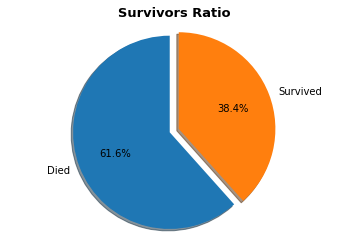

In [10]:
# Pie chart of Variable 'Survived'


import matplotlib.pyplot as plt

labels = 'Died', 'Survived'
sizes = [train_data['Survived'].loc[train_data['Survived'] == 0].count()/train_data['Survived'].count(), train_data['Survived'].loc[train_data['Survived'] == 1].count()/train_data['Survived'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Survived')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survivors Ratio',  fontsize=13,fontweight='bold')
plt.show()

**Comment:**

Pie Chart sy clearly daikh sakty hen ka 1/3 passengers survive kar saky.

In [11]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train_data['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

<BarContainer object of 2 artists>

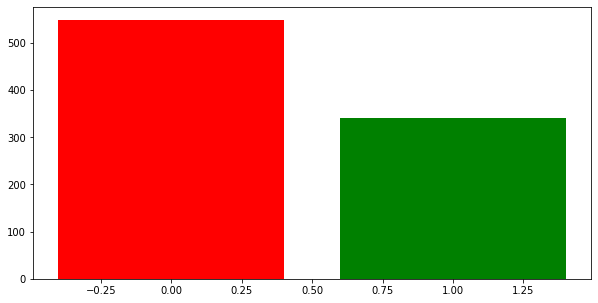

In [13]:
plt.figure(figsize=(10,5))
plt.bar(list(train_data['Survived'].value_counts().keys()),list(train_data['Survived'].value_counts()),color=['red','green'])

### ***Sex*** feature

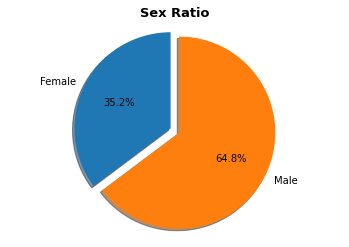

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [train_data['Sex'].loc[train_data['Sex'] == "female"].count()/train_data['Sex'].count(), train_data['Sex'].loc[train_data['Sex'] == "male"].count()/train_data['Sex'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sex Ratio',  fontsize=13,fontweight='bold')
plt.show()

In [15]:
## checking for Survived dependence of Sex feature
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


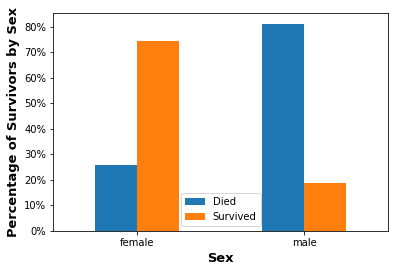

In [17]:
df=pd.crosstab(train_data['Sex'],train_data['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Sex',  fontsize=13,fontweight='bold')
plt.xlabel('Sex',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

plt.show()

**Comment:**

Agar is feature ko daikha jay to 2/3 male passenger they magar survived kay lihaz sy seen totally opposite hai or 3/4 of females ny survive kia.
aysa kun hoa uska jawab titanic movie kay end sy bhi mill sakta hai.

### **SibSp** feature

In [18]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.346470
3,3,0.250000
4,4,0.117647
5,5,0.000000
6,8,0.000000


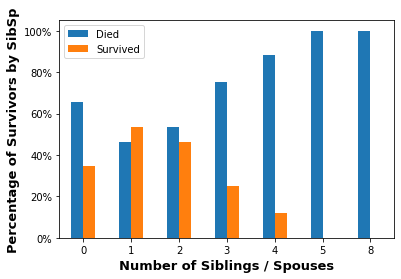

In [19]:
df=pd.crosstab(train_data['SibSp'],train_data['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by SibSp',  fontsize=13,fontweight='bold')
plt.xlabel('Number of Siblings / Spouses',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

**Comment:**

Graph sy aik intresting fact samny aa raha hai ka... Jaisy / Jaisy Sibling Spouses ki tadad barh rahi hai Survival ratio kam ho rahi hai.

### ***Parch*** feature

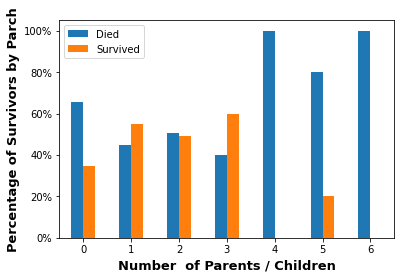

In [20]:
df=pd.crosstab(train_data['Parch'],train_data['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Parch',  fontsize=13,fontweight='bold')
plt.xlabel('Number  of Parents / Children',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

**Comment:**

Graph sy aik intresting fact samny aa raha hai ka... Jaisy Jaisy Parents / Child ki tadad barh rahi hai Survival ratio kam ho rahi hai.

### **Pclass** feature

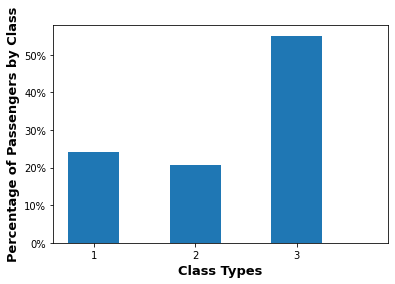

In [21]:
from matplotlib.ticker import PercentFormatter


plt.hist(train_data['Pclass'],weights=np.ones(len(train_data['Pclass'])) / len(train_data['Pclass']), bins=np.arange(1,5)-0.25 , width=0.5)

plt.ylabel('Percentage of Passengers by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.xticks(range(1,4))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

**Comment:**

Above graph mein daikh sakty hen ka more then 50% passengers 3rd class mein safar kar rahy thy.

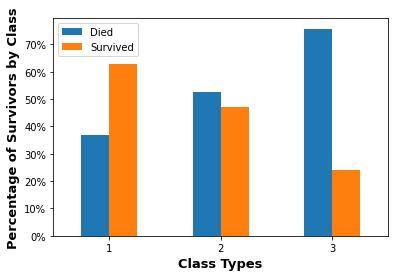

In [22]:
df=pd.crosstab(train_data['Pclass'],train_data['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

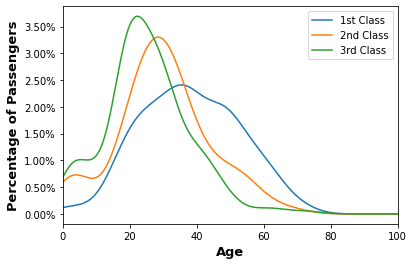

In [23]:
train_data.groupby('Pclass').Age.plot(kind='kde')
plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100 )
plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('1st Class')
L.get_texts()[1].set_text('2nd Class')
L.get_texts()[2].set_text('3rd Class')

In [24]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Comment**

2nd class mein died and survived ki ratio takreeban same hai magar
1st class and 3rd class mein scenario totally opposite hai jahan 1st class mein died ki percentage kam or survived ki ziada hai wahen 3rd class mein died ki percentage ziada and survived ki kafi kam hai.

### ***Age*** feature

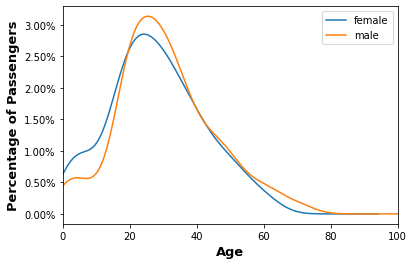

In [25]:
import scipy
train_data.groupby('Sex').Age.plot(kind='kde')

plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100)
plt.legend()
plt.show()

### ***Fare*** feature

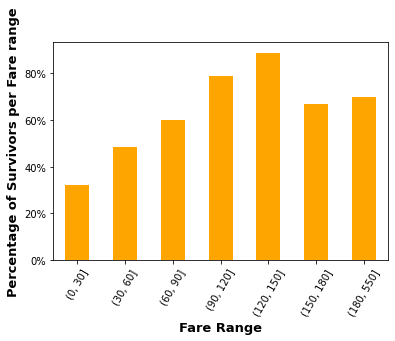

In [26]:
ranges = [0,30,60,90,120,150,180,550]


df1=pd.DataFrame(train_data['Fare'].loc[train_data['Survived'] == 1].value_counts())
df1=df1.groupby(pd.cut(df1.index, ranges)).sum()
df1.rename(columns={'Fare': 'Survivors'})
df2=pd.DataFrame(train_data['Fare'].value_counts())
df2=df2.groupby(pd.cut(df2.index, ranges)).sum()
df2.rename(columns={'Fare': 'Survivors'})

df3=df1/df2
df3.plot.bar(legend=None, color='orange')
plt.xticks(rotation=60)

plt.xlabel('Fare Range',  fontsize=13,fontweight='bold')
plt.ylabel('Percentage of Survivors per Fare range',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

Ham daikh sakty hen ka jaisy jaisy kiraya barha Survival ratio bhi barh gya.

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

In [29]:
## let's concatenate test and train datasets excluding ID and Target features
df = pd.concat((train_data.loc[:,'Pclass':'Embarked'], test_data.loc[:,'Pclass':'Embarked'])).reset_index(drop=True)

In [30]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value, %'] = round(df.isnull().sum()/df.shape[0]*100)
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,"Missing value, %",N unique value,dtype
Pclass,0.0,3,int64
Name,0.0,1307,object
Sex,0.0,2,object
Age,20.0,97,float64
SibSp,0.0,7,int64
Parch,0.0,8,int64
Ticket,0.0,929,object
Fare,0.0,281,float64
Cabin,77.0,186,object
Embarked,0.0,3,object


In [31]:
# New Title feature
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [32]:
df = df.drop(['Name'], axis=1)

## Data Preprocessing

In [ ]:
train_data['Embarked'].value_counts()

In [ ]:
#drop most of the columns, because our model will be very simple
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

#doing the same with test_data
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

## Transform Categorical Features into numerical

In [ ]:
#transform 'Sex' column values into '1' or '0'
train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})    
#doing the same with the test_data]
test_data['Sex'] = test_data['Sex'].replace({'male': 0, 'female': 1})

In [ ]:
#transform 'Embarked' column values in 1,2,3
train_data['Embarked'] = train_data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3}) 
#doing the same with the test_data]
test_data['Embarked'] = test_data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3}) 

In [ ]:
train_data.head()

## Dealing with Null Values

### Fill Na of 'Age' column with mean

In [ ]:
#fill null values in Age column:
mean_age = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(mean_age).astype('int')

#same with test_data:
test_mean_age = test_data['Age'].mean()
test_data['Age'] = test_data['Age'].fillna(test_mean_age).astype('int')

### Drop Na of 'Embarked' column

In [ ]:
train_data.dropna(subset=['Embarked'],inplace=True)

In [ ]:
#checking:
train_data.isnull().sum()

In [ ]:
#Spliting train data into X (features) and y (answear):
y = train_data['Survived']
X = train_data.drop(['Survived'], axis=1)

## Creating and Fit Model

### We are going to use a RandomTreeClassifier model

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

## Creating Predictions for test_data

In [ ]:
# Prediction of target for test data
y_pred = dtc.predict(X_test).astype(int)

# Saving the result into submission file
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission["Survived"] = y_pred
submission.to_csv('submission.csv', index=False)